<a href="https://colab.research.google.com/github/Elbx88/ML-Model-Perdiction/blob/main/Project_ML_Models_Erez_Levy_TMDB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Model Perdiction - Part VI - Imbalance Techniques & Model Selection & Fine Tuning & Model Evaluation

# The TMDB Dataset

The TMDB (The Movie Database) is a widely-used resource for movie and TV show data, providing valuable information such as ratings, plot summaries, and more.

This dataset contains a collection of 150,000 tv shows from the TMDB database, collected and cleaned.

# The Project Overview:


This dataset opens up a wide range of possibilities for data analysts and data scientists. Here are some ideas to get you started:

Explore trends in TV show popularity based on vote count and average.
Analyze TV show genres to identify the most popular genres or combinations of genres.
Investigate the relationship between TV show ratings and the number of seasons and episodes.
Build a recommendation system that suggests TV shows based on a user's favorite genres or languages.
Predict the success of a TV show based on features like vote count, average, and popularity.
Identify the most prolific TV show creators or production companies based on the number of shows they have created.
Explore the distribution of TV show run times and investigate whether episode duration affects the overall ratings.
Investigate TV show production trends across different countries and networks.
Analyze the relationship between TV show language and popularity, and investigate the popularity of non-English shows.
Track the status of TV shows (in production or not) and analyze their popularity over time.
Develop a language analysis model to identify sentiment or themes from TV show overviews.

I need to build a predictive model to determine the success of a TV show based on features like vote count, vote average, and popularity. We'll approach this as a regression problem, where we predict a continuous success metric, and we'll use multiple regression models.



**Approach**
Feature Selection: Choose the features you want to use for prediction (vote_count, vote_average, popularity, and potentially others like number_of_episodes, number_of_seasons).

Target Variable: Define the target variable. In this case, we'll use popularity as a measure of success.

Data Splitting: Split the data into training and testing sets.

Model Selection: Try several regression models:
Linear Regression: A good starting point for regression problems.
Random Forest Regressor: A more complex model that can capture non-linear relationships.
Gradient Boosting Regressor: Another advanced model known for good performance.

Model Training: Train the models on the training set.

Model Evaluation: Evaluate the models on the testing set using appropriate metrics (e.g., R-squared, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)).

Cross-Validation: Use Cross-Validation to ensure that the model does not overfit.

Hyperparameter Tuning: Use Hyperparameter Tuning to optimize the model parameters.

# Target Value prediction
Based on the potential insights and business value, I would suggest focusing on predicting either:

Popularity: It is a complex and dynamic metric that reflects overall success.
Vote Average (Rating): It captures audience satisfaction and critical acclaim.
Both of these targets have valuable real-world implications and can be approached with a variety of machine learning models.

Important Considerations:

Feature Engineering: Carefully select and engineer features from the TMDB data that you think will be most relevant to your chosen target variable.
Model Selection: Experiment with different machine learning models (regression for popularity or ratings, classification for status/renewal) to find the best performer.
Evaluation: Use appropriate metrics (like RMSE for regression or accuracy for classification) to assess the performance of your predictive model.

# Import the pickel file to load the Dataset tmdb_filtered from my Google Drive

In [2]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_filtered.pkl'

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_filtered = pickle.load(file)
    print(f"tmdb_filtered loaded from {file_path} successfully.")

    # You can now use the loaded DataFrame (tmdb_model)
    # For example, you can display the first few rows:
    print(tmdb_filtered.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_filtered loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_filtered.pkl successfully.
         id  number_of_episodes  vote_average first_air_date last_air_date  \
0   39280.0           -0.669403     -0.758413            NaT           NaT   
1  222838.6           -0.423177      1.451998     2023-05-28    2023-06-25   
2  222838.6           -0.176951     -0.758413     2014-05-15    2014-07-17   
3   34835.0           -0.078460      1.078811     2006-10-06    2006-12-22   
4   42598.0           -0.669403     -0.758413            NaT           NaT   

    episode_run_time  air_time  log_popularity  total_runtime  \
0  21863154728639042      49.0        0.904220      -0.503073   
1  10462587558510787      28.0        1.314755      -0.173808   
2   1022809265560642      63.0        0.904220      -0.503073   
3  21863154728639042      

# Imbalance Techniecs for the tmdb_model Dataset

In machine learning, imbalanced datasets refer to datasets where the distribution of classes is not equal. This means that one class (the majority class) has significantly more instances than another class (the minority class). This imbalance can pose a challenge for training machine learning models because the model might become biased towards the majority class and perform poorly on the minority class.

To address this issue, various imbalance techniques are used to rebalance the dataset or adjust the learning process to improve the model's performance on the minority class. Here are some common imbalance techniques:

In [ ]:
# Updating the tmdb_model with the tmdb_filtered Dataset
tmdb_model = tmdb_filtered.copy()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Define a binary target based on 'popularity'
median_popularity = tmdb_model['popularity'].median()
tmdb_model['success'] = (tmdb_model['popularity'] > median_popularity).astype(int)

# 2. Define features (X) and target (y)
X = tmdb_model.drop(columns=['popularity', 'success'])
y = tmdb_model['success']

# Convert date columns to numerical features (e.g., Unix timestamps)
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype(int)  # Convert to numerical representation like Unix timestamp

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)  # No need to impute missing values!

# 5. Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Accuracy: 0.9988
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6762
           1       1.00      1.00      1.00      6804

    accuracy                           1.00     13566
   macro avg       1.00      1.00      1.00     13566
weighted avg       1.00      1.00      1.00     13566



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.pipeline import Pipeline # Import Pipeline
import numpy as np

# 1. Define a binary target based on 'popularity'
median_popularity = tmdb_model['popularity'].median()
tmdb_model['success'] = (tmdb_model['popularity'] > median_popularity).astype(int)

# 2. Define features (X) and target (y)
X = tmdb_model.drop(columns=['popularity', 'success'])
y = tmdb_model['success']

# Convert date columns to numerical features
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype('int64')

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define resampling techniques
techniques = {
    "ROS": RandomOverSampler(random_state=42),
    "RUS": RandomUnderSampler(random_state=42),
    #"SMOTE": SMOTE(random_state=42),
    #"SMOTETomek": SMOTETomek(random_state=42)
}

# 5. Create a pipeline with imputation and scaling
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), # Impute missing values with the mean
    ('scaler', StandardScaler()), # Scale numerical features
])


# 6. Apply resampling and train a model using the pipeline
for technique_name, technique in techniques.items():
    # Resample the training data
    X_train_resampled, y_train_resampled = technique.fit_resample(X_train, y_train)

    # Replace infinite values with NaN before imputation
    X_train_resampled.replace([np.inf, -np.inf], np.nan, inplace=True)
    # Convert X_test to DataFrame before replace
    X_test_df = pd.DataFrame(X_test, columns=X_train.columns)
    X_test_df.replace([np.inf, -np.inf], np.nan, inplace=True) # Do the same for X_test
    X_test = X_test_df.values # Convert back to NumPy array for the pipeline

    # Fit the pipeline to the resampled training data
    X_train_resampled = pipeline.fit_transform(X_train_resampled)

    # Transform the test data using the fitted pipeline
    X_test = pipeline.transform(X_test)

    model = LogisticRegression(random_state=42)
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Results for {technique_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}\n")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Results for ROS:
Accuracy: 0.9951
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6762
           1       1.00      0.99      1.00      6804

    accuracy                           1.00     13566
   macro avg       1.00      1.00      1.00     13566
weighted avg       1.00      1.00      1.00     13566


Results for RUS:
Accuracy: 0.6759
Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.75      6762
           1       1.00      0.35      0.52      6804

    accuracy                           0.68     13566
   macro avg       0.80      0.68      0.64     13566
weighted avg       0.80      0.68      0.64     13566




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


# 6. Model Selection and Fine Tuning

Model Selection: Choose appropriate machine learning models based on the problem at hand (e.g., regression, classification, clustering).



# Support Vector Machine

SVM is a supervised ML Algorithm which can be used for both classification and regresstion models

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = tmdb_model.copy()  # Create a copy of the DataFrame
df

,id,number_of_episodes,vote_average,first_air_date,last_air_date,episode_run_time,air_time,log_popularity,total_runtime,vote_count_to_episodes_ratio,weighted_vote_average,popularity_score,popularity,success
0,39280.0,-0.669403,-0.758413,NaT,NaT,21863154728639042,49.0,0.904220,-0.503073,NaN,0.0,0.235002,-0.724942,0
1,222838.6,-0.423177,1.451998,2023-05-28,2023-06-25,10462587558510787,28.0,1.314755,-0.173808,0.600000,23.1,3.771919,0.979452,1
2,222838.6,-0.176951,-0.758413,2014-05-15,2014-07-17,1022809265560642,63.0,0.904220,-0.503073,0.000000,0.0,0.235002,-0.724942,0
3,34835.0,-0.078460,1.078811,2006-10-06,2006-12-22,21863154728639042,77.0,1.476119,-0.028931,0.833333,64.0,5.107964,1.865870,1
4,42598.0,-0.669403,-0.758413,NaT,NaT,1022809265560642,49.0,0.904220,-0.503073,NaN,0.0,0.235002,-0.724942,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82867,198986.0,-0.275441,-0.758413,2020-04-05,2020-05-24,1022809265560642,49.0,1.093748,-0.503073,0.000000,0.0,0.492722,-0.024281,1
82868,215996.0,-0.226196,-0.758413,2008-05-18,2009-03-29,18738859644157668,315.0,1.007272,0.326675,0.000000,0.0,0.369060,-0.360478,1
82869,75629.0,0.020030,1.825184,2007-04-01,2008-07-20,10048773954228443,476.0,1.124855,0.400431,0.214286,27.0,3.839885,0.103941,1
82870,158374.0,-0.226196,0.963985,2009-10-15,2009-12-10,1022809265560642,56.0,1.019887,-0.503073,0.111111,6.0,2.386441,-0.313225,1


# Classification Report

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy

# 1. Define a binary target based on 'popularity'
median_popularity = tmdb_model['popularity'].median()
tmdb_model['success'] = (tmdb_model['popularity'] > median_popularity).astype(int)

# 2. Define features (X) and target (y)
X = tmdb_model.drop(columns=['popularity', 'success'])
y = tmdb_model['success']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create a pipeline with imputation and scaling
# Convert datetime columns to numerical (if any) before imputation
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = X_train[col].astype('int64').astype(float)  # Convert to int64 then to float
    X_test[col] = X_test[col].astype('int64').astype(float)

# Replace infinite values with NaN before imputation
X_train.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace infinite values in X_train
X_test.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace infinite values in X_test

# Create pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler()),  # Scale numerical features
    ('classifier', HistGradientBoostingClassifier(random_state=42)),
])

# 5. Train and evaluate the pipeline
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9988
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6762
           1       1.00      1.00      1.00      6804

    accuracy                           1.00     13566
   macro avg       1.00      1.00      1.00     13566
weighted avg       1.00      1.00      1.00     13566



# Confusion Metrix

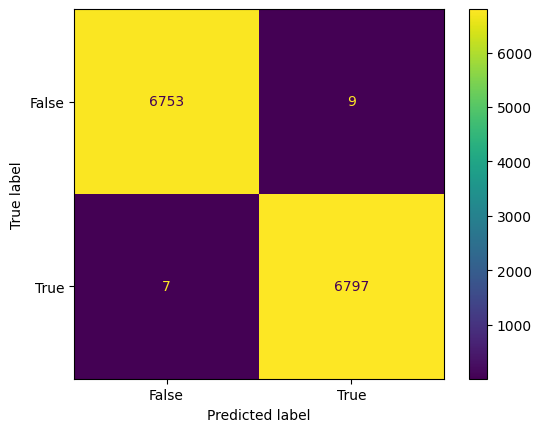

In [21]:
import sklearn.metrics as skmet
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


predictions = y_pred  # Assign y_pred to predictions

cmat = skmet.confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=[False, True])
cm_display.plot()
plt.show()

# Gridsearch:
**The machine learning find the optimal hyperparameters for a model. It helps improve model performance by systematically exploring different combinations of hyperparameter values and selecting the combination that yields the best results.**

hyperparameter trade-off     
Gread Search Cross-Validation     
C - achieving a low training error and a low testing error.0.1 week regulation<br>
gamma - controls the width of the radial basis function     
RFB: Radial Basis Function (linear, sigmoid, poly)     

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy

# Updating the tmdb_model with the tmdb_filtered Dataset
tmdb_model = tmdb_filtered.copy()

# 1. Define a binary target based on 'popularity'
median_popularity = tmdb_model['popularity'].median()
tmdb_model['success'] = (tmdb_model['popularity'] > median_popularity).astype(int)

# 2. Define features (X) and target (y)
X = tmdb_model.drop(columns=['popularity', 'success'])
y = tmdb_model['success']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create a pipeline with imputation and scaling
# Convert datetime columns to numerical (if any) before imputation
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = X_train[col].astype('int64').astype(float)  # Convert to int64 then to float
    X_test[col] = X_test[col].astype('int64').astype(float)

# Replace infinite values with NaN before imputation
X_train.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace infinite values in X_train
X_test.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace infinite values in X_test


# Create pipeline with imputer before SVC
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler()),  # Scale numerical features
    ('classifier', SVC(random_state=42)), #SVC in pipeline
])

from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'classifier__C': [0.1, 1, 10],  # Access SVC's C parameter through pipeline
    'classifier__gamma': [1, 0.1, 0.01],  # Access SVC's gamma parameter through pipeline
    'classifier__kernel': ['linear', 'sigmoid', 'poly']  # Access SVC's kernel parameter through pipeline
}

# Create the GridSearchCV object using the pipeline
grid = GridSearchCV(pipeline, param_grid, refit=True, verbose=2)

# Fit the grid search to your training data (X_train, y_train)
grid.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid.best_params_)

# Get the best model and make predictions
best_model = grid.best_estimator_
grid_predictions = best_model.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=linear; total time=   3.6s
[CV] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=linear; total time=   3.7s
[CV] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=linear; total time=   3.5s
[CV] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=linear; total time=   3.7s
[CV] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=linear; total time=   3.7s
[CV] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=sigmoid; total time= 1.6min
[CV] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=sigmoid; total time= 1.6min
[CV] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=sigmoid; total time= 1.7min
[CV] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=sigmoid; total time= 1.7min
[CV] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=sigmoid; to

**Grid Search Cross-Validation:**

Improved Model Performance: By systematically exploring different hyperparameter values, you are more likely to find the optimal settings that lead to better model performance.
Reduced Overfitting: Cross-validation helps prevent overfitting by evaluating the model on multiple subsets of the data.
Automation: Grid search automates the process of hyperparameter tuning, saving you time and effort.

In [25]:
# SVC Classifier Best Parameters
grid.best_params_

{'classifier__C': 10, 'classifier__gamma': 1, 'classifier__kernel': 'linear'}

In [26]:
grid_predictions = grid.predict(X_test)

In [27]:
grid.best_params_
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[6758    4]
 [   1 6803]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6762
           1       1.00      1.00      1.00      6804

    accuracy                           1.00     13566
   macro avg       1.00      1.00      1.00     13566
weighted avg       1.00      1.00      1.00     13566



In [28]:
tmdb_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67829 entries, 0 to 82871
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            67829 non-null  float64       
 1   number_of_episodes            67829 non-null  float64       
 2   vote_average                  67829 non-null  float64       
 3   first_air_date                48073 non-null  datetime64[ns]
 4   last_air_date                 48510 non-null  datetime64[ns]
 5   episode_run_time              67829 non-null  int64         
 6   air_time                      67829 non-null  float64       
 7   log_popularity                67829 non-null  float64       
 8   total_runtime                 67829 non-null  float64       
 9   vote_count_to_episodes_ratio  49794 non-null  float64       
 10  weighted_vote_average         67829 non-null  float64       
 11  popularity_score              678

# Support in SVMs

In SVMs, the "support vectors" are the data points from the training set that lie closest to the decision boundary (hyperplane). These points are the most critical for defining the hyperplane and determining the classification or regression outcome. They are called "support vectors" because they "support" or hold up the hyperplane.

# SVC - Support Vector Classifier

The Support Vector Classifier (SVC) is a supervised machine learning algorithm used for classification tasks. It aims to find an optimal hyperplane that best separates data points into different classes.

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy
from sklearn.svm import SVC # Import SVC


# 1. Define a binary target based on 'popularity'
median_popularity = tmdb_model['popularity'].median()
tmdb_model['success'] = (tmdb_model['popularity'] > median_popularity).astype(int)

# 2. Define features (X) and target (y)
X = tmdb_model.drop(columns=['popularity', 'success'])
y = tmdb_model['success']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create a pipeline with imputation and scaling
# Convert datetime columns to numerical (Unix timestamp) before imputation
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = X_train[col].astype('int64').astype(float)  # Convert to int64 then to float
    X_test[col] = X_test[col].astype('int64').astype(float)

# Replace infinite values with NaN before imputation
X_train.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace infinite values in X_train
X_test.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace infinite values in X_test

# Create pipeline with imputer before SVC
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler()),  # Scale numerical features
    ('classifier', SVC(C=1)),  # Your SVC model
])

# Fit the pipeline (including imputation) to your training data
pipeline.fit(X_train, y_train)

# Make predictions using the pipeline
pred = pipeline.predict(X_test)

# Evaluate the pipeline
accuracy = accuracy_score(y_test, pred) # Evaluate using 'pred'
report = classification_report(y_test, pred) # Evaluate using 'pred'

print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9912
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6762
           1       1.00      0.98      0.99      6804

    accuracy                           0.99     13566
   macro avg       0.99      0.99      0.99     13566
weighted avg       0.99      0.99      0.99     13566



# Support Vector Regressor :

SVR is a supervised machine learning algorithm used for regression tasks. It's based on the same principles as the Support Vector Machine (SVM) but adapted for predicting continuous target variables instead of discrete classes.



In [44]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline # Import Pipeline
from sklearn.impute import SimpleImputer #Import SimpleImputer
from sklearn.preprocessing import StandardScaler # Import StandardScaler


# Assuming 'tmdb_model' is your DataFrame with features and target 'popularity'
X = tmdb_model.drop('popularity', axis=1)  # Features
y = tmdb_model['popularity']  # Target variable

# Convert datetime columns to numerical (Unix timestamp) before splitting
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype('int64').astype(float)  # Convert to int64 then to float

# Replace infinite values with NaN before imputation
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Split data into training and testing sets after converting datetime columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a pipeline with imputation and scaling before the model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), # Impute missing values with the mean
    ('scaler', StandardScaler()), # Scale numerical features
    ('regressor', SVR()) #Your SVR Model
])


# Fit the pipeline (including imputation) to your training data
pipeline.fit(X_train, y_train) # Fit the pipeline to your training data

# Make predictions and evaluate
predictions1 = pipeline.predict(X_test) # Use pipeline to make predictions on the test data

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, predictions1)
mse = mean_squared_error(y_test, predictions1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions1)

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(predictions1)))

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.3f}")

Mean Absolute Error (MAE): 0.037
Mean Squared Error (MSE): 0.002
Root Mean Squared Error (RMSE): 0.048
R-squared (R²): 0.995
Root Mean Squared Logarithmic Error (RMSLE): 0.104


# Classification Models

#  Linear Regression

Type: Linear regression is a classic and widely used regression model that assumes a linear relationship between the features and the target variable (popularity).

In [49]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # Import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming 'tmdb_model' is your DataFrame with features and target 'popularity'
X = tmdb_model.drop('popularity', axis=1)  # Features
y = tmdb_model['popularity']  # Target variable

# Convert datetime columns to numerical (Unix timestamp) before splitting
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype('int64').astype(float)

# Replace infinite values with NaN before imputation
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with imputation and scaling before the model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler()),  # Scale numerical features
    ('regressor', SVR())  # Your SVR Model
])

# Fit the pipeline (including imputation) to your training data
pipeline.fit(X_train, y_train)

# Make predictions and evaluate
predictions1 = pipeline.predict(X_test)

# For regression, use metrics like MSE, MAE, R-squared
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Use y_test (the target values for the test set) for evaluation:
mse = mean_squared_error(y_test, predictions1)  # Changed y to y_test
mae = mean_absolute_error(y_test, predictions1)  # Changed y to y_test
r2 = r2_score(y_test, predictions1)  # Changed y and pred1 to y_test and predictions1

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Squared Error (MSE): 0.002
Mean Absolute Error (MAE): 0.037
R-squared (R²): 0.995


# Decision Tree

In [50]:
# Using DecisionTreeRegressor for continuous targets
from sklearn.tree import DecisionTreeRegressor

mod2 = DecisionTreeRegressor(random_state=1) # Changed to DecisionTreeRegressor
mod2.fit(X, y)

pred2 = mod2.predict(X)

# For regression, use metrics like MSE, MAE, R-squared
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, pred2)
mae = mean_absolute_error(y, pred2)
r2 = r2_score(y, pred2)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Squared Error (MSE): 0.000
Mean Absolute Error (MAE): 0.000
R-squared (R²): 1.000


# Linear Regression:

Type: Linear regression is a classic and widely used regression model that assumes a linear relationship between the features and the target variable (popularity).

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'tmdb_model' is your DataFrame
# Select features and target variable
features = ['number_of_episodes','popularity_score','success','log_popularity']
target = 'popularity'

X = tmdb_model[features]
y = tmdb_model[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
#model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example prediction: Create a sample data point for prediction
# Ensure the columns are in the same order as in X_train
# sample_data = pd.DataFrame({'success': [8.5], 'vote_count': [1000], 'number_of_episodes': [30],'log_popularity':[100]}) # This line is changed below
sample_data = pd.DataFrame([[1000, 30, 8.5, 100]],  # Values are reordered here to match features order
                           columns=features) # Using features list to ensure correct order

# Predict popularity for the sample data
predicted_popularity = model.predict(sample_data)
print(f"Predicted Popularity for sample data: {predicted_popularity[0]}")

Mean Squared Error: 0.0016833398079216702
R-squared: 0.9962864357042599
Predicted Popularity for sample data: 450.63702750892577


#Random Forest Regressor:

Type: An ensemble learning method that builds multiple decision trees and averages their predictions to improve accuracy and robustness.

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor

# Assuming 'tmdb_filtered' is your DataFrame
# Select features and target variable
features = ['popularity_score','number_of_episodes','success','log_popularity']
target = 'popularity'

X = tmdb_model[features]
y = tmdb_model[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
#model = LinearRegression()
model=RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example prediction:
# Create a sample data point for prediction
# Ensure the columns match the features used during training
sample_data = pd.DataFrame([[1000, 30, 8.5, 100]], columns=features) # Using the same features and order

# Predict popularity for the sample data
predicted_popularity = model.predict(sample_data)
print(f"Predicted Popularity for sample data: {predicted_popularity[0]}")

Mean Squared Error: 1.0278033806071678e-08
R-squared: 0.999999977325945
Predicted Popularity for sample data: 2.498953167294212


# The XGBoost model

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Assuming tmdb_model is your DataFrame with features and target variable 'popularity'

# 1. Define features (X) and target (y)
X = tmdb_model.drop('popularity', axis=1)  # Features (all columns except 'popularity')
y = tmdb_model['popularity']  # Target variable

# Convert datetime columns to numerical features (e.g., Unix timestamps)
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype('int64').astype(float)  # Convert to int64 then to float

# Replace infinite values with NaN before imputation
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Specify regression objective
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.1,  # Step size shrinkage used in update to prevents overfitting
    max_depth=3,  # Maximum depth of a tree
    subsample=0.8,  # Subsample ratio of the training instance
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    random_state=42  # Random seed for reproducibility
)

xgb_model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# 5. Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# 6. (Optional) Feature Importance
feature_importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
print("\nFeature Importance:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Root Mean Squared Error (RMSE): 0.009039797312510827
R-squared (R2): 0.9998197245701756

Feature Importance:
                         Feature  Importance
7                 log_popularity    0.485234
12                       success    0.465747
11              popularity_score    0.039580
1             number_of_episodes    0.007311
2                   vote_average    0.000755
9   vote_count_to_episodes_ratio    0.000630
10         weighted_vote_average    0.000366
3                 first_air_date    0.000225
4                  last_air_date    0.000095
0                             id    0.000031
5               episode_run_time    0.000012
6                       air_time    0.000007
8                  total_runtime    0.000006


# Models Selection and finetuning

In [58]:
tmdb_model.isna().sum()

,0
id,0
number_of_episodes,0
vote_average,0
first_air_date,19756
last_air_date,19319
episode_run_time,0
air_time,0
log_popularity,0
total_runtime,0
vote_count_to_episodes_ratio,18035


# TMDB Regression Models and Regression Metrics

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def regressionMetrics(y, yhat):
    res = {'MSE': metrics.mean_squared_error(y,yhat),
           'RMSE': np.sqrt(metrics.mean_squared_error(y,yhat)),
           'MAE': metrics.mean_absolute_error(y,yhat),
           'RMSLE': np.sqrt(metrics.mean_squared_log_error(y,yhat))
          }
    return res


# Regression Models

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#!pip install xgboost
import xgboost

X = tmdb_model.loc[:,tmdb_model.columns != 'popularity']
y = tmdb_model['popularity']

# Linear Regression

In [64]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#!pip install xgboost
import xgboost
import numpy as np  # Import numpy

# Convert datetime columns to numerical features (e.g., Unix timestamps) before fitting
for col in tmdb_model.select_dtypes(include=['datetime64']).columns:
    tmdb_model[col] = tmdb_model[col].astype('int64').astype(float)  # Convert to int64 then to float

X = tmdb_model.loc[:, tmdb_model.columns != 'popularity']
y = tmdb_model['popularity']

# Replace infinite values with NaN before creating the pipeline
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Create a pipeline with an imputer
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('regressor', LinearRegression())  # Your LinearRegression model
])

# Fit the pipeline (including imputation) to your data
pipeline.fit(X, y)

# Make predictions using the pipeline
pred1 = pipeline.predict(X)

# Calculate regression metrics
regressionMetrics(y, pred1)

<ipython-input-64-3c363aa3090f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


{'MSE': 0.36519980556710546,
 'RMSE': np.float64(0.6043176363197631),
 'MAE': 0.43140851264187174,
 'RMSLE': np.float64(0.713492785095866)}

In [65]:
model_dict = {'model': "Linear Regression"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred1)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,0.3652,0.604318,0.431409,0.713493


<Axes: xlabel='popularity'>

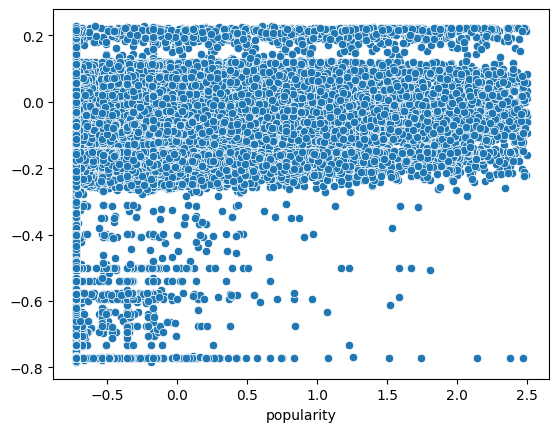

In [66]:
sns.scatterplot(x=y, y=pred1)

# Decision Tree

In [67]:
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [68]:
pred2 = mod2.predict(X)
model_dict = {'model': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred2)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,3.651998e-01,6.043176e-01,4.314085e-01,7.134928e-01
1,Decision Tree,1.569423e-25,3.961594e-13,2.708953e-13,1.440164e-12


<Axes: xlabel='popularity'>

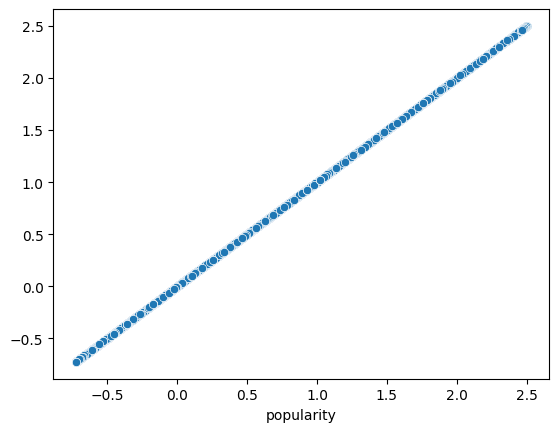

In [69]:
sns.scatterplot(x=y, y=pred2)

# Random Forest

In [70]:
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X,y)

RandomForestRegressor(random_state=1)

In [71]:
pred3 = mod3.predict(X)
model_dict = {'model': "RandomForest"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,3.651998e-01,6.043176e-01,4.314085e-01,7.134928e-01
1,Decision Tree,1.569423e-25,3.961594e-13,2.708953e-13,1.440164e-12
2,RandomForest,1.752239e-09,4.185975e-05,1.065316e-05,2.142479e-05


<Axes: xlabel='popularity'>

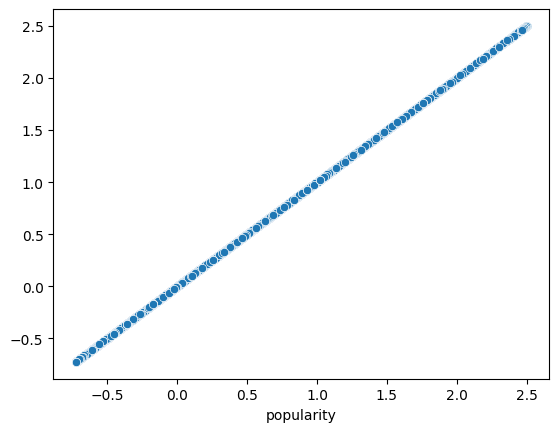

In [72]:
sns.scatterplot(x=y, y=pred3)

# Adaptive Boosting (ADABoost)

In [74]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # Import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming 'tmdb_model' is your DataFrame with features and target 'popularity'
X = tmdb_model.drop('popularity', axis=1)  # Features
y = tmdb_model['popularity']  # Target variable

# Convert datetime columns to numerical (Unix timestamp) before splitting
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype('int64').astype(float)

# Replace infinite values with NaN before imputation
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with imputation before AdaBoostRegressor
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('regressor', AdaBoostRegressor(random_state=1)),  # Your AdaBoostRegressor model
])

# Fit the pipeline (including imputation) to your data
pipeline.fit(X, y)  # Replace mod4.fit(X, y) with this line

# Fit the pipeline (including imputation) to your training data
pipeline.fit(X_train, y_train)

# Make predictions and evaluate
predictions1 = pipeline.predict(X_test)

# For regression, use metrics like MSE, MAE, R-squared
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Use y_test (the target values for the test set) for evaluation:
mse = mean_squared_error(y_test, predictions1)  # Changed y to y_test
mae = mean_absolute_error(y_test, predictions1)  # Changed y to y_test
r2 = r2_score(y_test, predictions1)  # Changed y and pred1 to y_test and predictions1

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Squared Error (MSE): 0.001
Mean Absolute Error (MAE): 0.024
R-squared (R²): 0.998


In [75]:
mod4 = AdaBoostRegressor(random_state=1)
pipeline.fit(X, y)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('regressor', AdaBoostRegressor(random_state=1))])

In [78]:
pred4 = pipeline.predict(X_test)  # Predict on X_test (test set)
model_dict = {'model': "ADABoost"}
# Use y_test (test set target values) for evaluation
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_test, pred4)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,3.651998e-01,6.043176e-01,4.314085e-01,7.134928e-01
1,Decision Tree,1.569423e-25,3.961594e-13,2.708953e-13,1.440164e-12
2,RandomForest,1.752239e-09,4.185975e-05,1.065316e-05,2.142479e-05
3,ADABoost,1.657772e-03,4.071575e-02,2.973612e-02,6.229777e-02


<Axes: xlabel='popularity'>

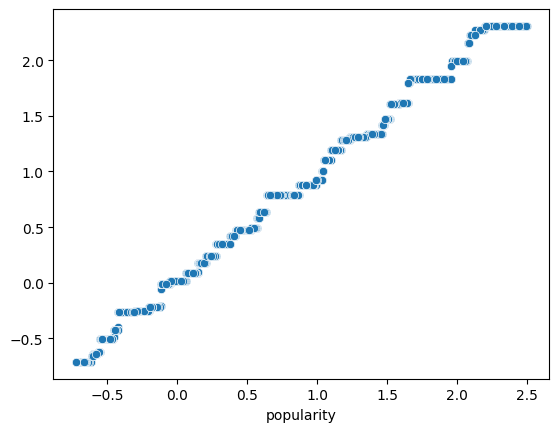

In [80]:
sns.scatterplot(x=y_test, y=pred4)

# Gradient Boosting Machine (GBM)

In [82]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # Import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming 'tmdb_model' is your DataFrame with features and target 'popularity'
X = tmdb_model.drop('popularity', axis=1)  # Features
y = tmdb_model['popularity']  # Target variable

# Convert datetime columns to numerical (Unix timestamp) before splitting
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype('int64').astype(float)

# Replace infinite values with NaN before imputation
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with imputation before AdaBoostRegressor
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('regressor',  GradientBoostingRegressor(random_state=1)),  # Your AdaBoostRegressor model
])

# Fit the pipeline (including imputation) to your data
pipeline.fit(X, y)  # Replace mod4.fit(X, y) with this line

# Fit the pipeline (including imputation) to your training data
pipeline.fit(X_train, y_train)

# Make predictions and evaluate
predictions1 = pipeline.predict(X_test)

# For regression, use metrics like MSE, MAE, R-squared
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Use y_test (the target values for the test set) for evaluation:
mse = mean_squared_error(y_test, predictions1)  # Changed y to y_test
mae = mean_absolute_error(y_test, predictions1)  # Changed y to y_test
r2 = r2_score(y_test, predictions1)  # Changed y and pred1 to y_test and predictions1

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Squared Error (MSE): 0.000
Mean Absolute Error (MAE): 0.002
R-squared (R²): 1.000


In [84]:
mod5 = GradientBoostingRegressor(random_state=1)
pipeline.fit(X, y)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('regressor', GradientBoostingRegressor(random_state=1))])

In [86]:
pred5 = pipeline.predict(X_test)  # Predict on X_test (test set)
model_dict = {'model': "GBM"}
# Use y_test (test set target values) for evaluation:
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_test, pred5)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,3.651998e-01,6.043176e-01,4.314085e-01,7.134928e-01
1,Decision Tree,1.569423e-25,3.961594e-13,2.708953e-13,1.440164e-12
2,RandomForest,1.752239e-09,4.185975e-05,1.065316e-05,2.142479e-05
3,ADABoost,1.657772e-03,4.071575e-02,2.973612e-02,6.229777e-02
4,GBM,1.651109e-05,4.063384e-03,2.077484e-03,3.873567e-03


<Axes: xlabel='popularity'>

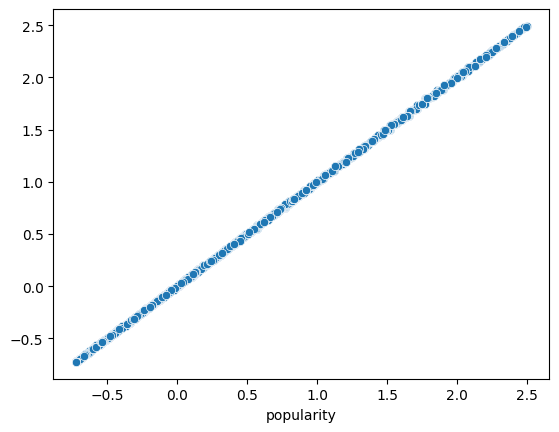

In [88]:
sns.scatterplot(x=y_test, y=pred5)

# Support Vector Regressor (SVR)

The Support Vector Regressor (SVR) is a powerful machine learning algorithm used for regression tasks. It's based on the same principles as the Support Vector Machine (SVM) but adapted for predicting continuous target variables instead of discrete classes.

In [91]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # Import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming 'tmdb_model' is your DataFrame with features and target 'popularity'
X = tmdb_model.drop('popularity', axis=1)  # Features
y = tmdb_model['popularity']  # Target variable

# Convert datetime columns to numerical (Unix timestamp) before splitting
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype('int64').astype(float)

# Replace infinite values with NaN before imputation
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with imputation before SupportVectorRegressor
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('regressor', SVR()),  # Your SupportVectorRegressor model, removed random_state
])

# Fit the pipeline (including imputation) to your data
pipeline.fit(X, y)  # Replace mod4.fit(X, y) with this line

# Fit the pipeline (including imputation) to your training data
pipeline.fit(X_train, y_train)

# Make predictions and evaluate
predictions1 = pipeline.predict(X_test)

# For regression, use metrics like MSE, MAE, R-squared
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Use y_test (the target values for the test set) for evaluation:
mse = mean_squared_error(y_test, predictions1)  # Changed y to y_test
mae = mean_absolute_error(y_test, predictions1)  # Changed y to y_test
r2 = r2_score(y_test, predictions1)  # Changed y and pred1 to y_test and predictions1

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Squared Error (MSE): 0.396
Mean Absolute Error (MAE): 0.420
R-squared (R²): 0.127


In [95]:
mod6 = SVR()
pipeline.fit(X,y)

Pipeline(steps=[('imputer', SimpleImputer()), ('regressor', SVR())])

In [98]:
pred6 = pipeline.predict(X_test)  # Predict on X_test (test set)
#pred6 = mod6.predict(X)
model_dict = {'model': "SVR"}
# Use y_test (the target values for the test set) for evaluation:
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_test, pred6)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,3.651998e-01,6.043176e-01,4.314085e-01,7.134928e-01
1,Decision Tree,1.569423e-25,3.961594e-13,2.708953e-13,1.440164e-12
2,RandomForest,1.752239e-09,4.185975e-05,1.065316e-05,2.142479e-05
3,ADABoost,1.657772e-03,4.071575e-02,2.973612e-02,6.229777e-02
4,GBM,1.651109e-05,4.063384e-03,2.077484e-03,3.873567e-03
5,SVR,3.957468e-01,6.290841e-01,4.200588e-01,6.694727e-01


<Axes: xlabel='popularity'>

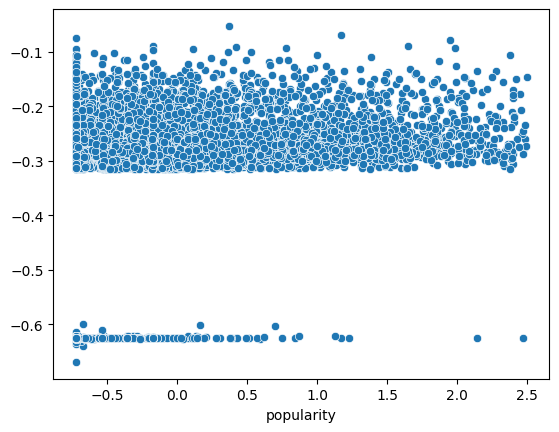

In [100]:
sns.scatterplot(x=y_test, y=pred6)

# XGBoost Regressor

In [101]:
mod7= xgb.XGBRegressor()
mod7.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [102]:
pred7 = mod7.predict(X)
model_dict = {'model': "XGB"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y, pred7)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,3.651998e-01,6.043176e-01,4.314085e-01,7.134928e-01
1,Decision Tree,1.569423e-25,3.961594e-13,2.708953e-13,1.440164e-12
2,RandomForest,1.752239e-09,4.185975e-05,1.065316e-05,2.142479e-05
3,ADABoost,1.657772e-03,4.071575e-02,2.973612e-02,6.229777e-02
4,GBM,1.651109e-05,4.063384e-03,2.077484e-03,3.873567e-03
5,SVR,3.957468e-01,6.290841e-01,4.200588e-01,6.694727e-01
6,XGB,6.713038e-06,2.590953e-03,1.296956e-03,2.255282e-03


<Axes: xlabel='popularity'>

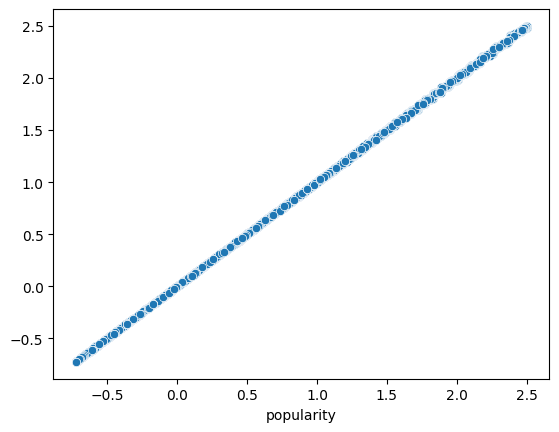

In [103]:
sns.scatterplot(x=y, y=pred7)

# Best Model Selection
**Metrics:**

MSE - Mean Squared Error

RMSE Root Mean Squared Error

MAE Mean Absolute Error - Calculates the average of the absolute differences between predicted and actual values.

RMSLE Root Mean Squared Logarithmic Error

In [104]:
models_list.sort_values('MAE')

,model,MSE,RMSE,MAE,RMSLE
1,Decision Tree,1.569423e-25,3.961594e-13,2.708953e-13,1.440164e-12
2,RandomForest,1.752239e-09,4.185975e-05,1.065316e-05,2.142479e-05
6,XGB,6.713038e-06,2.590953e-03,1.296956e-03,2.255282e-03
4,GBM,1.651109e-05,4.063384e-03,2.077484e-03,3.873567e-03
3,ADABoost,1.657772e-03,4.071575e-02,2.973612e-02,6.229777e-02
5,SVR,3.957468e-01,6.290841e-01,4.200588e-01,6.694727e-01
0,Linear Regression,3.651998e-01,6.043176e-01,4.314085e-01,7.134928e-01


In [105]:
models_list.sort_values('RMSE')

,model,MSE,RMSE,MAE,RMSLE
1,Decision Tree,1.569423e-25,3.961594e-13,2.708953e-13,1.440164e-12
2,RandomForest,1.752239e-09,4.185975e-05,1.065316e-05,2.142479e-05
6,XGB,6.713038e-06,2.590953e-03,1.296956e-03,2.255282e-03
4,GBM,1.651109e-05,4.063384e-03,2.077484e-03,3.873567e-03
3,ADABoost,1.657772e-03,4.071575e-02,2.973612e-02,6.229777e-02
0,Linear Regression,3.651998e-01,6.043176e-01,4.314085e-01,7.134928e-01
5,SVR,3.957468e-01,6.290841e-01,4.200588e-01,6.694727e-01


In [106]:
models_list.sort_values('RMSLE')

,model,MSE,RMSE,MAE,RMSLE
1,Decision Tree,1.569423e-25,3.961594e-13,2.708953e-13,1.440164e-12
2,RandomForest,1.752239e-09,4.185975e-05,1.065316e-05,2.142479e-05
6,XGB,6.713038e-06,2.590953e-03,1.296956e-03,2.255282e-03
4,GBM,1.651109e-05,4.063384e-03,2.077484e-03,3.873567e-03
3,ADABoost,1.657772e-03,4.071575e-02,2.973612e-02,6.229777e-02
5,SVR,3.957468e-01,6.290841e-01,4.200588e-01,6.694727e-01
0,Linear Regression,3.651998e-01,6.043176e-01,4.314085e-01,7.134928e-01


# Finding the hyperparameters for Best Model -Decision Tree  


Grid Search is a hyperparameter tuning technique used in machine learning to find the optimal combination of hyperparameters for a model. It works by systematically exploring a predefined set of hyperparameter values and evaluating the model's performance for each combination. The combination that yields the best performance is selected as the optimal set of hyperparameters.

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor

# Updating the tmdb_model with the tmdb_filtered Dataset
tmdb_model = tmdb_filtered.copy()

# 1. Define a binary target based on 'popularity'
median_popularity = tmdb_model['popularity'].median()
tmdb_model['success'] = (tmdb_model['popularity'] > median_popularity).astype(int)

# 2. Define features (X) and target (y)
X = tmdb_model.drop(columns=['popularity', 'success'])
y = tmdb_model['success']

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create a pipeline with imputation and scaling
# Convert datetime columns to numerical (if any) before imputation
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = X_train[col].astype('int64').astype(float)  # Convert to int64 then to float
    X_test[col] = X_test[col].astype('int64').astype(float)

# Replace infinite values with NaN before imputation
X_train.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace infinite values in X_train
X_test.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace infinite values in X_test


# Create pipeline with imputer before DecisionTreeRegressor
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler()),  # Scale numerical features
    ('classifier', DecisionTreeRegressor(random_state=42)), #DecisionTree in pipeline
])

from sklearn.model_selection import GridSearchCV


# Define the parameter grid with hyperparameters for DecisionTreeRegressor
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object using the pipeline
grid = GridSearchCV(pipeline, param_grid, refit=True, verbose=2)

# Fit the grid search to your training data (X_train, y_train)
grid.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid.best_params_)

# Get the best model and make predictions
best_model = grid.best_estimator_
grid_predictions = best_model.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.1s
[CV] END classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.1s
[CV] END classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.1s
[CV] END classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.1s
[CV] END classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.1s
[CV] END classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=5; total time=   0.1s
[CV] END classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=5; total time=   0.1s
[CV] END classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=5; total time=  

# Finding the Best Parameters and Best Score

In [112]:
# Print the best parameters and best score
print("Best Parameters:", grid.best_params_) # Changed grid_search to grid
print("Best Score:", -grid.best_score_) # Changed grid_search to grid

Best Parameters: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best Score: -1.0


# Decision Tree Regressor - Fine Tuning

Fine-tuning a Decision Tree Regressor involves finding the optimal hyperparameter values that minimize the model's error and improve its predictive performance

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming 'tmdb_model' is your DataFrame
# Select features and target variable
features = ['popularity_score','number_of_episodes','success','log_popularity']
target = 'popularity'

X = tmdb_model[features]
y = tmdb_model[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a pipeline with imputation, scaling, and the DecisionTreeRegressor
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler()),  # Scale numerical features
    ('regressor', DecisionTreeRegressor(random_state=42)),  # Your DecisionTreeRegressor model
])

# Define the parameter grid with hyperparameters for DecisionTreeRegressor
param_grid = {
    'regressor__max_depth': [3, 5, 7, 10],  # Maximum depth of the tree
    'regressor__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'regressor__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object using the pipeline
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)

# Fit the grid search to your training data (X_train, y_train)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best model and make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=2; total time=   0.0s
[CV] END regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=2; total time=   0.0s
[CV] END regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=2; total time=   0.0s
[CV] END regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=2; total time=   0.0s
[CV] END regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=2; total time=   0.0s
[CV] END regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=5; total time=   0.0s
[CV] END regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=5; total time=   0.0s
[CV] END regressor__max_depth=3, regressor__min_samples_leaf=1, regressor__min_samples_split=5; total time=   0.0s
[CV] END regressor

# Best Parameters for DecisionTree Regressor :

1. Regressor_max_depth : 10
2. Regressor_min_samples_leaf: 1
3. Reggressor_min_samples_split 2

**Mean Squared Error : 4.2426**

**R-Squared : 0.9999999**

# Cross-Validation:

Cross-validation is a crucial technique in machine learning used to evaluate the performance of a model and ensure it generalizes well to unseen data. It helps prevent overfitting, where a model performs well on the training data but poorly on new data.

# 1. k-Fold Cross-Validation

Reasoning: k-Fold Cross-Validation is a widely used technique that provides a robust estimate of model performance. It involves splitting your data into 'k' equal-sized folds. The model is trained on k-1 folds and tested on the remaining fold. This process is repeated 'k' times, with each fold serving as the test set once. The performance metric (e.g., R-squared, MAE) is averaged across all iterations to obtain a more reliable performance estimate.


In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression # Or any other model you're using
from sklearn.metrics import mean_squared_error

# Using 'tmdb_model' as myr DataFrame
# Select features and target variable
features = ['popularity_score','number_of_episodes','success','log_popularity']
target = 'popularity'


kf = KFold(n_splits=5) # Create a KFold object with 5 folds
scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression() # Initialize your model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    scores.append(mean_squared_error(y_test, y_pred))

average_score = np.mean(scores)
print(f"Average MSE across 5 folds: {average_score}")

Average MSE across 5 folds: 0.001715329991168931


# 2. Stratified k-Fold Cross-Validation

This technique is particularly useful when you have imbalanced classes in your target variable (although your target 'popularity' might be continuous). Stratified k-Fold ensures that each fold maintains the same proportion of target classes as the original dataset, leading to a more representative performance estimate, especially for minority classes.

In [115]:
import pandas as pd
from sklearn.model_selection import KFold  # Use KFold for continuous target
from sklearn.linear_model import LinearRegression  # Use Linear Regression for continuous target
from sklearn.metrics import mean_squared_error  # Use MSE for regression
import numpy as np

# Using 'tmdb_model' as myr DataFrame
# Select features and target variable
features = ['popularity_score','number_of_episodes','success','log_popularity']
target = 'popularity'


kf = KFold(n_splits=5)  # Change to KFold
scores = []

for train_index, test_index in kf.split(X):  # Remove y from split
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Use Linear Regression for continuous target 'popularity'
    model = LinearRegression()  # Initialize your model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    # Use mean_squared_error for regression
    scores.append(mean_squared_error(y_test, y_pred))

average_score = np.mean(scores)
print(f"Average MSE across 5 folds: {average_score}")

Average MSE across 5 folds: 0.001715329991168931


# 7. Models Evaluations

# Linear Regresion Evaluation - using appropriate metrics such as accuracy, precision, recall, F1-score, ROC-AUC for classification, or RMSE, MAE for regression.

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Using 'tmdb_model' as myr DataFrame
# Select features and target variable
features = ['popularity_score','number_of_episodes','success','log_popularity']
target = 'popularity'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()  # You can use your best_model from hyperparameter tuning here
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 0.04102852432054639
Mean Absolute Error (MAE): 0.02361605429568606
R-squared (R2): 0.9962864357042599


# Random Forest Regresion Evaluation - using appropriate metrics such as accuracy, precision, recall, F1-score, ROC-AUC for classification, or RMSE, MAE for regression.

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Using 'tmdb_model' as myr DataFrame
# Select features and target variable
features = ['popularity_score','number_of_episodes','success','log_popularity']
target = 'popularity'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)  # You can add hyperparameters here
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 9.926350624195408e-05
Mean Absolute Error (MAE): 2.5956612220911198e-05
R-squared (R2): 0.9999999782630615


# 8. Model  Evaluation

Performance Matrics:

Model evaluating using appropriate metrics such as accuracy, precision, recall, F1-score, ROC-AUC for classification, or RMSE, MAE for regression.

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error, mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance, d2_absolute_error_score, d2_pinball_score, d2_tweedie_score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error, mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance, d2_absolute_error_score, d2_pinball_score, d2_tweedie_score

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Or any other model you're using
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Using 'tmdb_model' as myr DataFrame
# Select features and target variable
features = ['popularity_score','number_of_episodes','success','log_popularity']
target = 'popularity'

# 1. Split data into training, validation, and testing sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
# 0.25 x 0.8 = 0.2

# 2. Create and train the model on the training set
model = DecisionTreeRegressor(random_state=42)  # Or your other model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Ensure y_test and y_pred are non-negative and strictly positive respectively
y_test = np.maximum(y_test, 0)  # Clip negative values in y_test to 0
y_pred = np.maximum(y_pred, np.finfo(np.float64).eps)  # Clip non-positive values in y_pred to a small positive value

# Calculate and print Regression metrics:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

# Max Error
max_err = max_error(y_test, y_pred)
print("Max Error:", max_err)

# Median Absolute Error
median_ae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", median_ae)

# Root Mean Squared Logarithmic Error (RMSLE) - Useful for positive targets
# Make sure y_test and y_pred are positive before using this metric
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle)

# Mean Poisson Deviance:
# Useful for count data (e.g., number of views, clicks)
# Assumes Poisson distribution for target variable

poisson_deviance = mean_poisson_deviance(y_test, y_pred)
print("Mean Poisson Deviance:", poisson_deviance)

# Mean Gamma Deviance:
# Ensure y_test and y_pred are strictly positive for the transformations
y_test = np.maximum(y_test, np.finfo(np.float64).eps)  # Clip to a small positive value
y_pred = np.maximum(y_pred, np.finfo(np.float64).eps)  # Clip to a small positive value

# Apply transformations ensuring strictly positive values
y_test_transformed = np.log1p(y_test)
y_pred_transformed = np.log1p(y_pred)

# Now calculate the Mean Gamma Deviance
gamma_deviance = mean_gamma_deviance(y_test_transformed, y_pred_transformed)
print("Mean Gamma Deviance:", gamma_deviance)

# D2 Tweedie Score:
# A generalization of Poisson and Gamma deviance
# Can handle different types of data
# Requires specifying the 'power' parameter (see documentation)
# Example with power=1 (similar to Poisson deviance):

d2_tweedie = d2_tweedie_score(y_test, y_pred, power=1)
print("D2 Tweedie Score (power=1):", d2_tweedie)

# D2 Pinball Score:
# Useful for quantile regression
# Assumes you want to predict a specific quantile of the target
# Requires specifying the 'alpha' parameter (the quantile level)
# Example with alpha=0.5 (median prediction):

d2_pinball = d2_pinball_score(y_test, y_pred, alpha=0.5)
print("D2 Pinball Score (alpha=0.5):", d2_pinball)

# D2 Absolute Error Score:
# Similar to MAE but uses a different weighting scheme

d2_absolute_error = d2_absolute_error_score(y_test, y_pred)
print("D2 Absolute Error Score:", d2_absolute_error)

Mean Squared Error (MSE): 4.901099953321971e-08
Mean Absolute Error (MAE): 4.470068284324272e-05
R-squared (R2): 0.999999742040156
Explained Variance Score: 0.9999997420709597
Max Error: 0.00551252593891105
Median Absolute Error: 2.220446049250313e-16
Root Mean Squared Logarithmic Error (RMSLE): 8.817635143957718e-05
Mean Poisson Deviance: 4.699094965690461e-08
Mean Gamma Deviance: 2.754438955068568e-06
D2 Tweedie Score (power=1): 0.9999999254747526
D2 Pinball Score (alpha=0.5): 0.9997579213843345
D2 Absolute Error Score: 0.9997579213843345


# 9. Model Deployment Preperation

# Download model 'tmdb_dep' Dataset  Using Pickel file to Google Drive

Saving the Model tmdb_model  as 'tmdb_dep.pkl'

In [126]:
# Import necessary libraries
import pickle
from google.colab import drive

# Save tmdb_filtered as tmdb_eng

tmdb_dep=tmdb_model

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path where you want to save the pickle file in your Google Drive
# Make sure to replace 'your_folder' with the actual folder name in your Google Drive, or create the folder.
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_dep.pkl'

# Check if the directory exists, and if not, create it
import os
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")

# Now, let's save the tmdb_ready DataFrame to a pickle file
try:
  with open(file_path, 'wb') as file:
      pickle.dump(tmdb_dep, file)
  print(f"tmdb_dep saved to {file_path}")
except NameError:
  print('Run all the code in the notebook until the Dataframe tmdb_dep is created')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_dep saved to /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_dep.pkl


# Import pickel file 'tmdb_dep.pkl' from Google Drive

In [127]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_dep.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_dep = pickle.load(file)
    print(f"tmdb_model loaded from {file_path} successfully.")

    # You can now use the loaded DataFrame (tmdb_model)
    # For example, you can display the first few rows:
    print(tmdb_dep.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_model loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_dep.pkl successfully.
         id  number_of_episodes  vote_average first_air_date last_air_date  \
0   39280.0           -0.669403     -0.758413            NaT           NaT   
1  222838.6           -0.423177      1.451998     2023-05-28    2023-06-25   
2  222838.6           -0.176951     -0.758413     2014-05-15    2014-07-17   
3   34835.0           -0.078460      1.078811     2006-10-06    2006-12-22   
4   42598.0           -0.669403     -0.758413            NaT           NaT   

    episode_run_time  air_time  log_popularity  total_runtime  \
0  21863154728639042      49.0        0.904220      -0.503073   
1  10462587558510787      28.0        1.314755      -0.173808   
2   1022809265560642      63.0        0.904220      -0.503073   
3  21863154728639042      77.0    